## Task1

In [1]:
import pandas as pd
import os
from tqdm import tqdm
import json
import numpy as np
import seaborn as sns

In [14]:
date_list = ["5172022", "5182022", "5192022", "5202022", "5212022", "5222022", "5232022"]
job_url_data = pd.DataFrame()
data_path = "/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_url_data"
for d in date_list:
    for file_name in os.listdir("/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_url_data"):
        if file_name.startswith("job_urls_for_parsehub_" + d):
            this_df = pd.read_csv(data_path + "/" + file_name)
            date_data = [d for _ in range(len(this_df))]
            this_df["date"] = date_data
            job_url_data = pd.concat([job_url_data, this_df])
job_url_data = job_url_data.reset_index()
del job_url_data["index"]

In [15]:
url_set = set(job_url_data["job_url"])
j_data = {}

for url in tqdm(url_set):
    j_data[url] = job_url_data[job_url_data["job_url"] == url]["date"].min()

100%|████████████████████████████████████| 21260/21260 [01:41<00:00, 208.86it/s]


In [16]:
with open("url_date.json", "w") as f:
    f.write(json.dumps(j_data, ensure_ascii=False, indent=4, separators=(',', ':')))

In [34]:
print(len(url_set))

21260


## Task2

In [27]:
job_info_data = pd.DataFrame()
data_path = "/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_info_data"
for d in date_list:
    for file_name in os.listdir("/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_info_data"):
        if file_name.startswith("parsehub_" + d) and file_name.endswith(".csv"):
            this_df = pd.read_csv(data_path + "/" + file_name, encoding="ISO-8859-1")
            date_data = [d for _ in range(len(this_df))]
            this_df["date"] = date_data
            job_info_data = pd.concat([job_info_data, this_df])
job_info_data = job_info_data.reset_index()
del job_info_data["index"]

In [29]:
with open('/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_info_data/parsehub_5182022_v2.json','r',encoding='utf8')as fp:
    json_data1 = json.load(fp)["lnks"] #reading json file 
with open('/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_info_data/parsehub_5202022_v2.json','r',encoding='utf8')as fp:
    json_data2 = json.load(fp)["lnks"]
json_data = json_data1 + json_data2

In [35]:
nan = np.nan
len518 = len(json_data1)
df_len = len(job_info_data)
for i in tqdm(range(len(json_data))):
    new_item = pd.DataFrame({
        'lnks_link': nan,
        'lnks_job_title':nan,
        'lnks_company':nan,
        'lnks_company_url':nan,
        'lnks_company_location':nan,
        'lnks_job_description':nan,
        'date':nan
    }, index=[df_len + i])
    this_json = json_data[i]
    
    try:
        new_item['lnks_link'] = this_json['link']
    except:
        pass
    try:
        new_item['lnks_job_title'] = this_json['job_title']
    except:
        pass
    try:
        new_item['lnks_company'] = this_json['company']
    except:
        pass
    try:
        new_item['lnks_company_url'] = this_json['company_url']
    except:
        pass
    try:
        new_item['lnks_company_location'] = this_json['company_location']
    except:
        pass
    try:
        new_item['lnks_job_description'] = this_json['job_description']
    except:
        pass
    try:
        if i < len518:
            new_item['date'] = "5182022"
        else:
            new_item['date'] = "5202022"
    except:
        pass
    job_info_data = job_info_data.append(new_item)

  0%|                                                  | 0/7692 [00:00<?, ?it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  0%|▏                                        | 37/7692 [00:00<02:02, 62.73it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  1%|▎                                        | 67/7692 [00:01<01:47, 71.04it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  1%|▌                                       | 100/7692 [00:01<01:44, 72.47it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  3%|█▏                                      | 221/7692 [00:03<02:09, 57.63it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  3%|█▎                                      | 251/7692 [00:03<02:11, 56.49it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  4%|█▍                                      | 282/7692 [00:04<01:47, 68.75it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  4%|█▌                                      | 310/7692 [00:04<01:51, 66.14it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  5%|██                                      | 403/7692 [00:06<01:44, 69.76it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
  6%|██▏                                     | 431/7692 [00:06<01:57, 62.05it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

  6%|██▍                                     | 460/7692 [00:06<01:51, 65.02it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

  8%|███▎                                    | 648/7692 [00:09<01:38, 71.62it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 10%|███▊                                    | 738/7692 [00:10<01:49, 63.66it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 10%|████▏                                   | 799/7692 [00:11<01:42, 67.08it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 13%|█████                                   | 985/7692 [00:14<01:50, 60.60it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 14%|█████▎                                 | 1046/7692 [00:15<01:40, 66.31it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 14%|█████▍                                 | 1075/7692 [00:16<01:41, 65.12it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 14%|█████▌                                 | 1105/7692 [00:16<01:33, 70.67it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 15%|█████▋                                 | 1134/7692 [00:17<01:46, 61.32it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 16%|██████▏                                | 1224/7692 [00:18<01:34, 68.09it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 16%|██████▎                                | 1255/7692 [00:18<01:35, 67.07it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 17%|██████▋                                | 1318/7692 [00:19<01:41, 62.51it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 18%|██████▊                                | 1347/7692 [00:20<01:39, 63.92it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 19%|███████▎                               | 1439/7692 [00:21<01:43, 60.55it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 19%|███████▍                               | 1468/7692 [00:22<01:34, 65.79it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 20%|███████▊                               | 1531/7692 [00:23<01:38, 62.80it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 20%|███████▉                               | 1563/7692 [00:23<01:25, 71.96it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 21%|████████                               | 1595/7692 [00:24<01:20, 75.51it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 21%|████████▏                              | 1627/7692 [00:24<01:21, 74.57it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 22%|████████▍                              | 1658/7692 [00:24<01:30, 66.83it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 22%|████████▌                              | 1688/7692 [00:25<01:27, 68.48it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 22%|████████▋                              | 1717/7692 [00:25<01:28, 67.84it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 23%|████████▊                              | 1749/7692 [00:26<01:23, 71.47it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 24%|█████████▍                             | 1869/7692 [00:27<01:18, 73.73it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 25%|█████████▋                             | 1901/7692 [00:28<01:22, 70.60it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 26%|██████████▏                            | 2019/7692 [00:30<01:21, 69.33it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 27%|██████████▍                            | 2051/7692 [00:30<01:19, 71.16it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 27%|██████████▌                            | 2083/7692 [00:30<01:17, 72.49it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 28%|██████████▊                            | 2142/7692 [00:31<01:32, 59.99it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 28%|███████████                            | 2173/7692 [00:32<01:21, 67.74it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 29%|███████████▏                           | 2208/7692 [00:32<01:23, 65.30it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 29%|███████████▌                           | 2269/7692 [00:33<01:21, 66.84it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 30%|███████████▋                           | 2298/7692 [00:34<01:19, 67.79it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 30%|███████████▊                           | 2328/7692 [00:34<01:18, 68.60it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 31%|████████████▎                          | 2420/7692 [00:35<01:13, 71.29it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 32%|████████████▍                          | 2450/7692 [00:36<01:17, 67.77it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 34%|█████████████▏                         | 2598/7692 [00:38<01:22, 61.86it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 35%|█████████████▍                         | 2662/7692 [00:39<01:18, 63.92it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 35%|█████████████▋                         | 2691/7692 [00:40<01:18, 63.55it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 35%|█████████████▊                         | 2719/7692 [00:40<01:19, 62.70it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 36%|█████████████▉                         | 2751/7692 [00:40<01:08, 72.03it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 37%|██████████████▍                        | 2842/7692 [00:42<01:14, 64.92it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 37%|██████████████▌                        | 2870/7692 [00:42<01:19, 60.47it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 38%|██████████████▋                        | 2900/7692 [00:43<01:11, 67.33it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 38%|██████████████▊                        | 2931/7692 [00:43<01:09, 68.85it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 38%|███████████████                        | 2960/7692 [00:44<01:10, 67.50it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 39%|███████████████▏                       | 2989/7692 [00:44<01:10, 66.32it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 40%|███████████████▍                       | 3054/7692 [00:45<01:18, 59.19it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 40%|███████████████▋                       | 3084/7692 [00:46<01:21, 56.40it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 41%|████████████████                       | 3175/7692 [00:47<01:17, 58.60it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 42%|████████████████▌                      | 3266/7692 [00:48<01:05, 67.76it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 43%|████████████████▋                      | 3295/7692 [00:49<01:05, 66.95it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 44%|█████████████████▏                     | 3384/7692 [00:50<01:05, 65.73it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 44%|█████████████████▎                     | 3415/7692 [00:51<01:00, 70.65it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 45%|█████████████████▍                     | 3447/7692 [00:51<00:59, 71.24it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 46%|██████████████████                     | 3567/7692 [00:53<00:58, 70.60it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 47%|██████████████████▏                    | 3599/7692 [00:53<00:57, 71.47it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 48%|██████████████████▋                    | 3687/7692 [00:55<00:57, 69.08it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 48%|██████████████████▊                    | 3719/7692 [00:55<00:54, 72.89it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 49%|███████████████████                    | 3751/7692 [00:55<00:53, 73.08it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 50%|███████████████████▋                   | 3871/7692 [00:57<00:52, 72.38it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 51%|███████████████████▊                   | 3903/7692 [00:57<00:52, 71.54it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 52%|████████████████████▍                  | 4023/7692 [00:59<00:51, 71.76it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 55%|█████████████████████▎                 | 4205/7692 [01:02<00:47, 73.00it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 56%|█████████████████████▉                 | 4324/7692 [01:03<00:48, 69.46it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 57%|██████████████████████                 | 4355/7692 [01:04<00:49, 67.92it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 57%|██████████████████████▏                | 4387/7692 [01:04<00:46, 71.63it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 59%|███████████████████████                | 4538/7692 [01:07<00:49, 63.24it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 59%|███████████████████████▏               | 4566/7692 [01:07<00:50, 62.06it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 60%|███████████████████████▍               | 4629/7692 [01:08<00:48, 63.63it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 61%|███████████████████████▌               | 4658/7692 [01:09<00:45, 65.98it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 61%|███████████████████████▊               | 4687/7692 [01:09<00:49, 60.48it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 61%|███████████████████████▉               | 4718/7692 [01:10<00:52, 56.23it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 62%|████████████████████████               | 4747/7692 [01:10<00:46, 63.67it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 62%|████████████████████████▎              | 4783/7692 [01:11<00:46, 62.61it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 63%|████████████████████████▍              | 4811/7692 [01:11<00:48, 59.56it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 63%|████████████████████████▌              | 4843/7692 [01:12<00:49, 57.96it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 63%|████████████████████████▋              | 4871/7692 [01:12<00:44, 63.67it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 65%|█████████████████████████▎             | 4996/7692 [01:14<00:38, 70.51it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 66%|█████████████████████████▋             | 5056/7692 [01:15<00:40, 64.96it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 66%|█████████████████████████▊             | 5084/7692 [01:15<00:40, 65.15it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 66%|█████████████████████████▉             | 5115/7692 [01:16<00:38, 67.57it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 67%|██████████████████████████             | 5143/7692 [01:16<00:37, 67.41it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 67%|██████████████████████████▏            | 5176/7692 [01:16<00:35, 70.47it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 68%|██████████████████████████▍            | 5206/7692 [01:17<00:35, 69.66it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 70%|███████████████████████████▏           | 5364/7692 [01:19<00:30, 76.44it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 71%|███████████████████████████▋           | 5456/7692 [01:20<00:33, 67.38it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 71%|███████████████████████████▊           | 5487/7692 [01:21<00:32, 68.05it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 72%|███████████████████████████▉           | 5519/7692 [01:21<00:30, 71.56it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 73%|████████████████████████████▍          | 5611/7692 [01:23<00:31, 66.85it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 73%|████████████████████████████▌          | 5639/7692 [01:23<00:31, 65.55it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 75%|█████████████████████████████          | 5735/7692 [01:25<00:28, 69.19it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 75%|█████████████████████████████▏         | 5765/7692 [01:25<00:30, 62.52it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 75%|█████████████████████████████▎         | 5793/7692 [01:25<00:31, 60.97it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 76%|█████████████████████████████▌         | 5823/7692 [01:26<00:28, 64.63it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 76%|█████████████████████████████▋         | 5853/7692 [01:26<00:27, 67.67it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 76%|█████████████████████████████▊         | 5883/7692 [01:27<00:26, 68.10it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 77%|█████████████████████████████▉         | 5913/7692 [01:27<00:26, 67.67it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 77%|██████████████████████████████▏        | 5944/7692 [01:28<00:23, 73.75it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 78%|██████████████████████████████▍        | 6006/7692 [01:28<00:20, 84.24it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 79%|██████████████████████████████▋        | 6042/7692 [01:29<00:19, 83.71it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 81%|███████████████████████████████▋       | 6252/7692 [01:31<00:17, 81.12it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 82%|████████████████████████████████       | 6316/7692 [01:32<00:16, 83.37it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 83%|████████████████████████████████▎      | 6379/7692 [01:33<00:15, 85.79it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 84%|████████████████████████████████▋      | 6442/7692 [01:34<00:15, 79.62it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 86%|█████████████████████████████████▍     | 6598/7692 [01:36<00:15, 72.84it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 86%|█████████████████████████████████▌     | 6630/7692 [01:36<00:14, 72.12it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 87%|█████████████████████████████████▊     | 6662/7692 [01:37<00:14, 71.28it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 88%|██████████████████████████████████▍    | 6782/7692 [01:39<00:12, 70.94it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 89%|██████████████████████████████████▌    | 6812/7692 [01:39<00:13, 67.26it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 89%|██████████████████████████████████▋    | 6842/7692 [01:39<00:12, 68.80it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

 89%|██████████████████████████████████▊    | 6872/7692 [01:40<00:11, 71.78it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 90%|███████████████████████████████████    | 6904/7692 [01:40<00:10, 73.44it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 91%|███████████████████████████████████▌   | 7024/7692 [01:42<00:09, 72.62it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 93%|████████████████████████████████████▏  | 7144/7692 [01:44<00:07, 72.99it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

 95%|█████████████████████████████████████▏ | 7324/7692 [01:46<00:05, 72.39it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 96%|█████████████████████████████████████▎ | 7356/7692 [01:47<00:04, 72.42it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 97%|█████████████████████████████████████▉ | 7476/7692 [01:48<00:03, 68.30it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 98%|██████████████████████████████████████ | 7506/7692 [01:49<00:02, 70.97it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
 98%|██████████████████████████████████████▏| 7537/7692 [01:49<00:02, 71.32it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
100%|██████████████████████████████████████▊| 7657/7692 [01:51<00:00, 73.29it/s]/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is depr

/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_info_data = job_info_data.append(new_item)
/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_94565/966730123.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

In [36]:
#drop n/a value
job_info_data_clean = job_info_data.dropna(axis=0)

#drop duplicated value 
job_info_data_clean = job_info_data_clean.drop_duplicates(subset="lnks_link", keep='last').reset_index()
del job_info_data_clean["index"]

In [37]:
job_info_data_clean ##we could observe that there was 14389 unique jobs in the cleaned dataframe.

,lnks_link,lnks_job_title,lnks_company,lnks_company_url,lnks_company_location,lnks_job_description,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...,5172022
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,Access Specialist,Pikes Peak Community College,https://www.indeed.com/cmp/Pikes-Peak-Communit...,"Colorado Springs, CO 80906",Tracking Code: 40069\nWork Type: Full-time\nCa...,5172022
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,Clinic Registered Nurse - Family Practice - FT,Memorial Regional Health,https://www.indeed.com/cmp/Memorial-Regional-H...,"Craig, CO 81625",Position Purpose: The Registered Nurse is resp...,5172022
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,Sr Wetland Scientist/Permitting Specialist,Jacobs,https://www.indeed.com/cmp/Jacobs?campaignid=m...,"Wethersfield, CT 06109",Our People & Places Solutions business â rei...,5172022
4,https://www.indeed.com/company/Swiss-American-...,Quality Assurance Engineer,Swiss American CDMO,https://www.indeed.com/cmp/Swiss-American-Cdmo...,"Carrollton, TX 75006",QUALITY ASSURANCE ENGINEER II\nPosition Summar...,5172022
...,...,...,...,...,...,...,...
14384,https://www.indeed.com/rc/clk?jk=a8d74ee85d99b...,RN Case Manager Part Time,Advocate Aurora Health,https://www.indeed.com/cmp/Advocate-Aurora-Hea...,"Grafton, WI 53024",Major Responsibilities:\nConducts complete ass...,5202022
14385,https://www.indeed.com/rc/clk?jk=c2a99bb4bb751...,Patient Access Coordinator,Baptist Health System KY & IN,https://www.indeed.com/cmp/Baptist-Health-Syst...,"New Albany, IN 47150",Job Description:\nBHMG - Pain Management Floyd...,5202022
14386,https://www.indeed.com/rc/clk?jk=259c9e5110a9a...,CCOR Compliance Officer - Associate,"JPMorgan Chase Bank, N.A.",https://www.indeed.com/cmp/Chase-2?campaignid=...,"Columbus, OH",Primary responsibilities include:\nCommunicate...,5202022
14387,https://www.indeed.com/company/Athas-Capital-G...,Internal Auditor,"Athas Capital Group, Inc.",https://www.indeed.com/cmp/Athas-Capital-Group...,"Irvine, CA 92612",Job description\nDo you possess the dream to d...,5202022


## Task3

In [38]:
date_list = ["5172022", "5182022", "5192022", "5202022", "5212022", "5222022", "5232022"]
job_url_data = pd.DataFrame()
data_path = "/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_url_data"
for d in date_list:
    for file_name in os.listdir("/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_url_data"):
        if file_name.startswith("job_urls_for_parsehub_" + d):
            this_df = pd.read_csv(data_path + "/" + file_name)
            date_data = [d for _ in range(len(this_df))]
            this_df["date"] = date_data
            job_url_data = pd.concat([job_url_data, this_df])
job_url_data = job_url_data.reset_index()
del job_url_data["index"]
job_url_data.columns=["lnks_link", "date"]

job_info_data = pd.DataFrame()
data_path = "/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_info_data"
for d in date_list:
    for file_name in os.listdir("/Users/edu/Documents/compsoc/code/indeed_scraped_data/job_info_data"):
        if file_name.startswith("parsehub_" + d) and file_name.endswith(".csv"):
            this_df = pd.read_csv(data_path + "/" + file_name, encoding="ISO-8859-1")
            date_data = [d for _ in range(len(this_df))]
            this_df["date"] = date_data
            job_info_data = pd.concat([job_info_data, this_df])
job_info_data = job_info_data.reset_index()
del job_info_data["index"]

In [39]:
job_data_merge = job_url_data.merge(job_info_data)
job_data_merge

,lnks_link,date,lnks_job_title,lnks_company,lnks_company_url,lnks_company_location,lnks_job_description
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...
1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...
3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...
4,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...
...,...,...,...,...,...,...,...
45269,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022,NaN,NaN,NaN,NaN,NaN
45270,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022,Director of Surgery,St. David's Medical Center,https://www.indeed.com/cmp/St.-David's-Healthc...,"Austin, TX 78705",Description\nIntroduction\nExecutives thrive w...
45271,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022,NaN,NaN,NaN,NaN,NaN
45272,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022,Director of Surgery,St. David's Medical Center,https://www.indeed.com/cmp/St.-David's-Healthc...,"Austin, TX 78705",Description\nIntroduction\nExecutives thrive w...


In [40]:
merge_linkdate = job_data_merge[["lnks_link", "date"]]
percentage = len(job_data_merge)/len(job_url_data)
percentage

0.7424279693675079

In [41]:
flag = []
for item in tqdm(job_url_data.iloc):
    link = item["lnks_link"]
    date = item["date"]
    this_df = merge_linkdate[(merge_linkdate["lnks_link"] == link) & (merge_linkdate["date"] == date)]
    if len(this_df) > 0:
        flag.append(False)
    else:
        flag.append(True)

60981it [05:58, 169.98it/s]


In [42]:
miss_data = job_url_data[flag].reset_index()
del miss_data["index"]

In [43]:
missdata_by_date = miss_data.groupby(['date']).agg({'lnks_link': 'count'}).reset_index()

<AxesSubplot:xlabel='date', ylabel='lnks_link'>

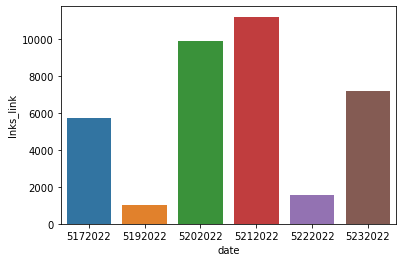

In [44]:
#distribution of missed data
sns.barplot(x='date', y='lnks_link', data=missdata_by_date)

In [45]:
import operator
matched_data_flag = list(map(operator.not_, flag))

<AxesSubplot:xlabel='date', ylabel='lnks_link'>

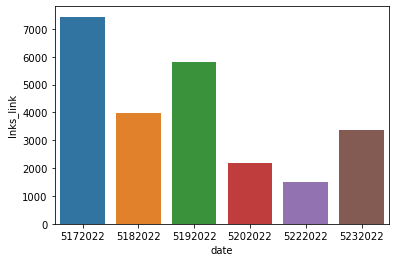

In [46]:
matched_data = job_url_data[matched_data_flag].reset_index()
del matched_data["index"]
matched_data = matched_data.groupby(['date']).agg({'lnks_link': 'count'}).reset_index()
#distribution of matched data
sns.barplot(x='date', y='lnks_link', data=matched_data)

<AxesSubplot:xlabel='date', ylabel='lnks_link'>

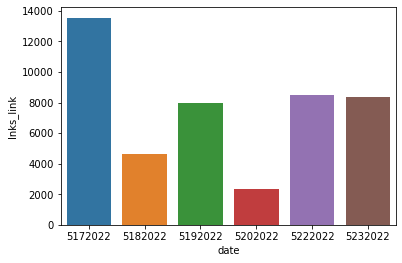

In [47]:
matched_job_data = job_data_merge.groupby(['date']).agg({'lnks_link': 'count'}).reset_index()
#distribution of complete data
sns.barplot(x='date', y='lnks_link', data=matched_job_data)

according to the distribution shown above, we could observe that the missed data were located in the 5/20 and 5/21, compared to other dates, 5/18's missed data infintely closed to zero, 5/19 and 5/22's missed data generally remained low. 5/17-5/19 had the most matched data compared to the whole time window, while the matched data of 5/21 infinitely closed to zero. In the complete data distribution we could observe that 5/17 had the most data collected, while 5/19,5/22 and 5/23 remain the similar level. 5/18 had the best quality in data (no missing) and 5/21 had the worst quality (most are missing and no matched). It is very likely that data collection stragety is flawed because the distrbution of data collection does not follow normality (certain day have no missed data and certain day have no matched data), however it could also due to the quality of data itself. 